# Lab 4 Into Notes

### Check the excel data file is in the same folder as this running notebook

In [1]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is B899-AB94

 Directory of C:\Users\student\Desktop

10/17/2019  02:06 PM    <DIR>          .
10/17/2019  02:06 PM    <DIR>          ..
10/17/2019  02:06 PM    <DIR>          .ipynb_checkpoints
10/17/2019  02:01 PM            57,586 govt_camp_2013_01_to_2016_03.xlsx
10/02/2019  12:56 PM             1,457 Kaltura Capture.lnk
10/17/2019  02:06 PM               555 lab4_intro_notes.ipynb
05/13/2016  01:33 PM               210 MSDS Online.url
08/01/2018  04:14 PM    <DIR>          Safety Information
10/17/2019  02:05 PM                72 Untitled.ipynb
               5 File(s)         59,880 bytes
               4 Dir(s)  322,521,710,592 bytes free


### Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# if using a Jupyter notebook, inlcude:
%matplotlib inline

### Import the .xlsx data file as a pandas dataframe

In [21]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


In [23]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['STATION','STATION_NAME','DATE',], axis=1, inplace=True)
df.head()

,year,month,day,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [24]:
df.shape

(1186, 8)

In [25]:
wd = np.array(df)
wd.shape

(1186, 8)

## Create a figure with 4 sub-plots

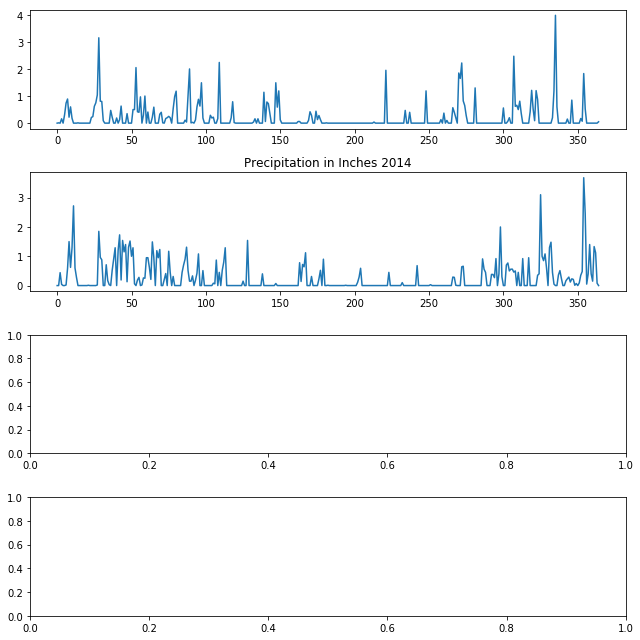

In [34]:
# Create the data, an array of precipitation data in inches for each year for 4 years
# years: 2013, 2014, 2015,2016
mask2013 = wd[:,0] == 2013
mask2014 = wd[:,0] == 2014

precip = wd[:,3]
precip2013 = precip[mask2013]
precip2014 = precip[mask2014]

# Create a figure object fig and 4 axis objects, ax1, ax2, ax3, ax4
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(9,9))

# Create the 4 subplots and customize
ax1.plot(precip2013)

ax2.plot(precip2014)
ax2.set_title('Precipitation in Inches 2014')

# show the plot and apply a "tight layout" so that everthing fits
plt.tight_layout()
plt.show()

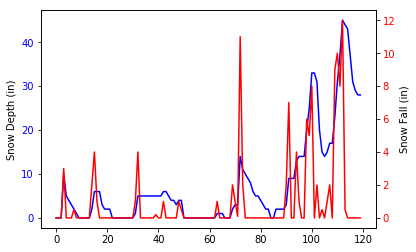

In [43]:
# Pull out just the data from Nov 2013 to Feb 2014, both snow fall and snow depth
sd = wd[:,4]
sf = wd[:,5]

mask2013 = wd[:,0]==2013
masknovdec = wd[:,1] >= 11
mask2013nd = np.logical_and(mask2013, masknovdec)

mask2014 = wd[:,0]==2014
maskjanfeb = wd[:,1] <= 2
mask2014jf = np.logical_and(mask2014, maskjanfeb)

mask = np.logical_or(mask2013nd, mask2014jf)

sd_masked = sd[mask]
sf_masked = sf[mask]


# Create the fig, ax objects for the first (left-hand) y-axis
fig, ax1 = plt.subplots()

ax1.plot(sd_masked,'b')
ax1.set_ylabel('Snow Depth (in)')
ax1.tick_params(axis='y', labelcolor='b')

# Create the ax object for the second(right-hand) y-axis
ax2 = ax1.twinx()
ax2.plot(sf_masked,'r')
ax2.set_ylabel('Snow Fall (in)')
ax2.tick_params(axis='y', labelcolor='r')

# show the plot
plt.show()